# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [315]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [316]:
# frequency table for prestige and whether or not someone was admitted
ftable=pd.crosstab(df['admit'],[df['prestige']],rownames=['admit'], colnames=['rank'])
ftable

rank,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [317]:
df = pd.get_dummies(df, columns=['prestige'], drop_first=True)

In [318]:
df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: Modeling class variables requires one less dummy variable than the number of distinct values. E.g. for prestige, since the values are 1,2,3,4, we can drop any one of the 4 resulting dummy variables. In this case, we drop 1 and retain prestige_2.0, prestige_3.0 and prestige_4.0

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [319]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
ftable=pd.crosstab(df['admit'],[df['prestige_2.0'], df['prestige_3.0'], df['prestige_4.0']],rownames=['admit'], colnames=['rank 2','rank 3','rank 4'])
ftable

rank 2   0           1
rank 3   0       1   0
rank 4   0   1   0   0
admit                 
0       28  55  93  95
1       33  12  28  53

#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [320]:
ftable.append(ftable.sum(), ignore_index=True)

rank 2   0             1
rank 3   0        1    0
rank 4   0   1    0    0
0       28  55   93   95
1       33  12   28   53
2       61  67  121  148

In [321]:
odds_rank1=float(ftable.iloc[1,0])/(ftable.iloc[0,0]+ftable.iloc[1,0])
print odds_rank1

0.540983606557


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [322]:
admitted_234 = ftable.iloc[1,1]+ftable.iloc[1,2]+ftable.iloc[1,3]
not_admitted_234 = ftable.iloc[0,1]+ftable.iloc[0,2]+ftable.iloc[0,3]
odds_rank234 = float(admitted_234)/(not_admitted_234+admitted_234)
print odds_rank234

0.276785714286


#### 3.3 Calculate the odds ratio

In [323]:
odds_ratio = odds_rank1 / odds_rank234
print odds_ratio

1.95452141724


#### 3.4 Write this finding in a sentenance: 

Answer: You are twice as likely to be admitted if you attended an undergraduate institution with prestige rank 1 than if you attended an undergraduate institution of lesser rank.

#### 3.5 Print the cross tab for prestige_4

In [324]:
ftable=pd.crosstab(df['admit'],[ df['prestige_4.0']],rownames=['admit'], colnames=['rank 4'])
ftable

rank 4,0,1
admit,,
0,216,55
1,114,12


#### 3.6 Calculate the OR 

In [325]:
odds_rank4=float(ftable.iloc[1,1])/(ftable.iloc[0,1]+ftable.iloc[1,1])
print odds_rank4

0.179104477612


In [326]:
odds_rank123 = float(ftable.iloc[1,0])/(ftable.iloc[0,0]+ftable.iloc[1,0])
print odds_rank123

0.345454545455


In [327]:
odds_ratio = odds_rank4 / odds_rank123
print odds_ratio

0.518460329929


#### 3.7 Write this finding in a sentence

Answer: You are half as likely to be admitted if you attended an undergraduate institution with prestige rank 4 than if you attended an undergraduate institution of greater rank.

## Part 4. Analysis

In [328]:
# create a clean data frame for the regression
print df.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [329]:
# manually add the intercept
df['intercept'] = 1.0
print df.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61             0             1             0        1.0
1      1  660.0  3.67             0             1             0        1.0
2      1  800.0  4.00             0             0             0        1.0
3      1  640.0  3.19             0             0             1        1.0
4      0  520.0  2.93             0             0             1        1.0


#### 4.1 Set the covariates to a variable called train_cols

In [330]:
train_cols = ['gre','gpa','prestige_2.0','prestige_3.0','prestige_4.0']

#### 4.2 Fit the model

In [331]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
lm = LogisticRegression()

In [332]:
#sklearn
result_sk = lm.fit(df.loc[:,train_cols],df['admit'])

In [333]:
#statsmodel
logit = sm.Logit(df['admit'], df[train_cols])
result_sm = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


#### 4.3 Print the summary results

In [334]:
#sklearn
print lm.score(df[train_cols],df['admit'])
print lm.intercept_
print lm.coef_

0.705289672544
[-1.81701706]
[[ 0.00178497  0.23229458 -0.60347467 -1.17214957 -1.37729795]]


In [335]:
#statsmodel
result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Sun, 27 Aug 2017   Pseudo R-squ.:                 0.05722
Time:                        19:54:13   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191      -0.001       0.003
gpa             -0.1323      0.195     -0.680      0.497      -0.514       0.249
prestige_2.0    -0.9562      0.302     -3.171      0.002      -1.547      -0.365
prestige_3.0    -1.5375      0.332     -4.627      0.000      -2.189      -0.886
prestige_4.0    -1.8699      0.401     -4.658      0.000      -2.657      -1.083
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [336]:
#sklearn
np.exp(lm.coef_)

array([[ 1.00178657,  1.26149128,  0.546908  ,  0.3097005 ,  0.25225925]])

In [337]:
#statsmodel
params = result_sm.params
conf = result_sm.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           0.999320  1.003420  1.001368
gpa           0.598303  1.282800  0.876073
prestige_2.0  0.212826  0.694082  0.384342
prestige_3.0  0.112055  0.412207  0.214918
prestige_4.0  0.070176  0.338540  0.154135


#### 4.5 Interpret the OR of Prestige_2

sklearn
Answer: The odds of being admitted is 55% lower if the prestige of your undergraduate institution is 2, as compared to the odds when the prestige rank is not 2.

statsmodel
Answer: The odds of being admitted is 38% lower if the prestige of your undergraduate institution is 2, as compared to the odds when the prestige rank is not 2.

#### 4.6 Interpret the OR of GPA

sklearn
Answer: The odds of being admitted increases by about 1.26 times for every unit increase in GPA.

statsmodel
Answer: The odds of being admitted decreases by about 0.87 times for every unit increase in GPA.

This difference in predicted behaviours between sklearn and statsmodel can be explained as a non-linear relationship between GPA and the odds of admittance and/or GPA may be too correlated with other features. The standard error of the GPA is also the same order of magnitude as the coefficient, indicating there is a relatively high variance in the data set, which may be affecting predictions as well.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [338]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [339]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(df['gre'].min(), df['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(df['gpa'].min(), df['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [340]:
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [341]:
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [342]:
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,1.0,0,0,0
1,220.0,2.260000,2.0,1.0,1,0,0
2,220.0,2.260000,3.0,1.0,0,1,0
3,220.0,2.260000,4.0,1.0,0,0,1
4,220.0,2.453333,1.0,1.0,0,0,0


#### 5.2 Make predictions on the enumerated dataset

In [343]:
combos['admit_pred'] = result.predict(combos[train_cols])

print combos.tail()

       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0             0             0   
396  800.0  4.000000       1.0        1.0             0             0   
397  800.0  4.000000       2.0        1.0             1             0   
398  800.0  4.000000       3.0        1.0             0             1   
399  800.0  4.000000       4.0        1.0             0             0   

     prestige_4.0  admit_pred  
395             1    0.217506  
396             0    0.637399  
397             0    0.403204  
398             0    0.274202  
399             1    0.213184  


#### 5.3 Interpret findings for the last 4 observations

Answer: These 4 candidates have high GRE and GPA, but each attended an undergraduate school of prestige that is ranked 1, 2, 3 or 4. When evaluating students with the same standardized score, it is more likely that students that attended higher ranking undergraduate school would be admitted. 
Rank 1 : 64% probability admission
Rank 2 : 40%
Rank 3 : 27%
Rank 4 : 21%

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


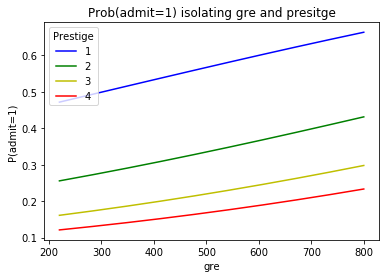

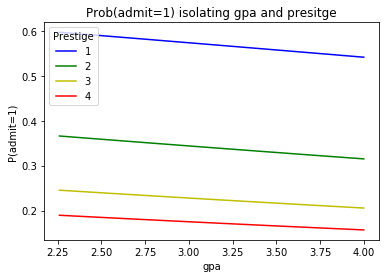

In [344]:
def isolate_and_plot(variable):
      # isolate gre and class rank
      grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],aggfunc=np.mean)
      # make a plot
      colors = 'rbgyrbgy'
      for col in combos.prestige.unique():
          plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and presitge")
      pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')
